In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df=df[1:]
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


In [6]:
import nltk
import re
import string

In [7]:
df.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...


In [8]:
review_df = df[['Text']]
print(review_df.shape)
review_df.head(15)

(99, 1)


,Text
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
5,I got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...
8,Right now I'm mostly just sprouting this so my...
9,This is a very healthy dog food. Good for thei...
10,I don't know if it's the cactus or the tequila...


In [ ]:
# pip install textblob

In [11]:
from textblob import TextBlob

In [12]:


testimonial = TextBlob("The food was great!")
print(testimonial.sentiment)

Sentiment(polarity=1.0, subjectivity=0.75)


In [13]:
text = TextBlob('she is a very bad cook. I dont like the food')
print(text.sentiment)


Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)


In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [15]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
review_df.head()

,Text
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
5,I got a wild hair for taffy and ordered this f...


In [17]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 1 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    99 non-null     object
dtypes: object(1)
memory usage: 924.0+ bytes


In [18]:
review_df['TextBlob_Subjectivity'] = review_df['Text'].apply(getSubjectivity)

In [19]:
review_df['TextBlob_Polarity'] = review_df['Text'].apply(getPolarity)

In [20]:
review_df.head(20)

,Text,TextBlob_Subjectivity,TextBlob_Polarity
1,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333
2,This is a confection that has been around a fe...,0.448571,0.133571
3,If you are looking for the secret ingredient i...,0.533333,0.166667
4,Great taffy at a great price. There was a wid...,0.637500,0.483333
5,I got a wild hair for taffy and ordered this f...,0.601481,0.257407
6,This saltwater taffy had great flavors and was...,0.607500,0.250833
7,This taffy is so good. It is very soft and ch...,0.691000,0.486000
8,Right now I'm mostly just sprouting this so my...,0.545238,0.428571
9,This is a very healthy dog food. Good for thei...,0.562500,0.450000
10,I don't know if it's the cactus or the tequila...,0.682478,0.208594


In [21]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
review_df['TextBlob_final'] = review_df['TextBlob_Polarity'].apply(getAnalysis)


In [22]:
review_df.head()

,Text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_final
1,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333,Negative
2,This is a confection that has been around a fe...,0.448571,0.133571,Positive
3,If you are looking for the secret ingredient i...,0.533333,0.166667,Positive
4,Great taffy at a great price. There was a wid...,0.637500,0.483333,Positive
5,I got a wild hair for taffy and ordered this f...,0.601481,0.257407,Positive


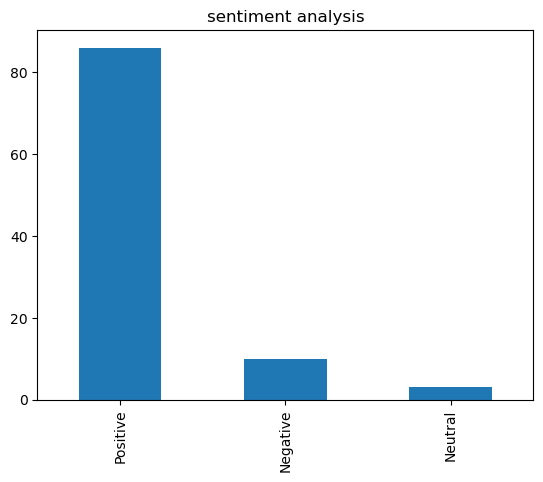

In [23]:
import matplotlib.pyplot as plt
review_df.TextBlob_final.value_counts().plot(kind='bar',title="sentiment analysis")
plt.show()